### `Name:Rahul Limbachiya`

## Task 1 - Prediction using Supervised ML 
### GRIPMAR21 @ The Sparks Foundation
#### Data Science and Business Analytics Intern
> `Problem statement- Predict the percentage of an student based on the no. of study hours.
It is a simple linear regression task involving two features. 
Dataset can be found `[here](http://bit.ly/w-data)

__*Import the revelent libraries*__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

__*Loading Dataset from the source*__

In [2]:
data = pd.read_csv('http://bit.ly/w-data')

__*Exploratory data analysis*__

In [3]:
# Displaying initial 10 records
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


`descirbe()` is a pandas method to give useful descriptive statistics from each column of the dataframe

In [4]:
# Here we can see the there are total of 25 record with 2 features
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#Checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.corr()
#Correlation means association- more precisely it is a measure of the extent to which two variables are related. 
#Here, we can also observe that they both features are positively correlated

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### *Define the dependent and the independent variables*

In [8]:
y = data['Scores']
x1 = data['Hours']

### Input data Visualization

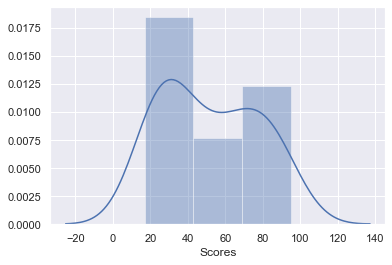

In [9]:
sns.distplot(data['Scores'])

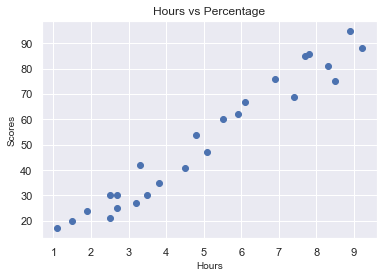

In [10]:
plt.scatter(x1,y)
plt.xlabel('Hours', fontsize=10)
plt.ylabel('Scores', fontsize=10)
plt.title('Hours vs Percentage')
plt.show()

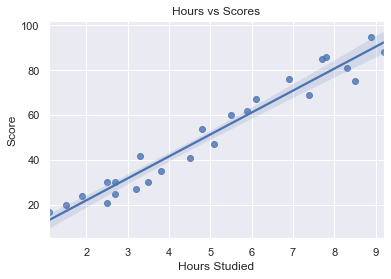

In [11]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

`NOTE: From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and score.`


### Data Preparing

In [12]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

### Training the Model
> We here split our data into training and testing sets, and then we finally train our algorithm.



In [13]:
#Using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 
print("Training complete.")

Training complete.


### *OLS Regression*

Ordinary Least Squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. The `sm.OLS` method takes two array-like objects `a` and `b` as input. `a` is generally a Pandas dataframe or a NumPy array. The shape of `a` is `o*c`, where `o` is the number of observations and `c` is the number of columns. `b` is generally a Pandas series of length `o` or a one dimensional NumPy array.

In [15]:
x= sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           9.13e-17
Time:                        22:56:36   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

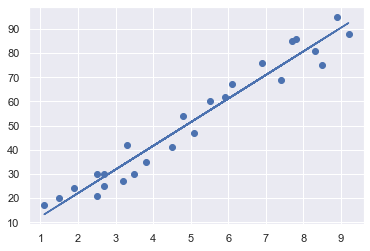

In [16]:
# Plotting the regression line
line = 9.7758*X + 2.4837
#The above values are taken from the OLS Regression table. where 
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [17]:
print(X_test) # Testing data - In Hours

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


### *Making Predictions*
>Now that we have trained our algorithm, it's time to test the model by making some predictions.
For this we will use our test-set data

In [18]:
Y_pred = regressor.predict(X_test) # Predicting the scores
Y_pred

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

In [19]:
#Comparing the Results
res = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
res

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


In [20]:

#Estimating training and test score
print("Training Score:",regressor.score(X_train,Y_train))
print("Test Score:",regressor.score(X_test,Y_test))

Training Score: 0.954930331163377
Test Score: 0.9377551740781869


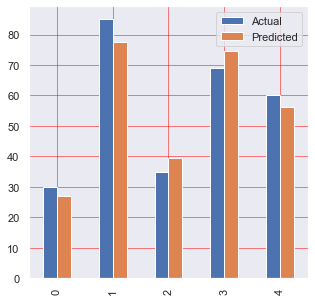

In [21]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

res.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

#### We see that our predictions are reasonably similar to the actual values

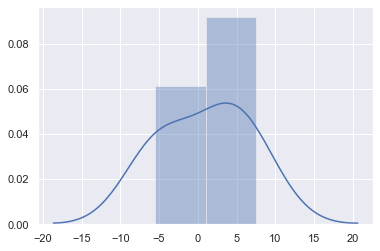

In [22]:
#Residuals
sns.distplot(np.array(Y_test-Y_pred))

### *Predicting Score for student studying for 9.25 hours*



In [23]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.54521954029958


### *Evaluating the model*
> The final step is to evaluate the performance of algorithm.This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 4.937597792467706
Mean Squared Error: 26.675642597052256
Root Mean Squared Error: 5.164846812544614
R-2: 0.9377551740781869


`R-squared` gives the goodness of the fit and as can be seen it is `93.77%` which is really good. This means that the algorithm has proven to be good for the given data.
It can also be said that `the model's accuracy is 93.77%`

**Conclusion**

I was successfully able to carry-out prediction using Supervised Machine Learning task and was able to evaluate the model's performance on various parameters.